# Project BigData
submit by:
daniel zaguri - 203289780
elad ben haim - 301416467
tomer machluf - 201273463

* [Data Preprocessing](#data)
    * [make an age data frame](#df1)
    * [make an treat type data frame](#df2)
    * [make an GDP data frame](#df3)
        * [make an delta GDP by perc and a diff between years](#gdp_d)
        * [remove outliers of gdp](#gdp_o)
* [Model Planing](#planing)
    * [scaled the data for linear regression](#scale)
    * [discover the ranges of GDP](#gdp_r)
    * [the correlation between the features](#corr)
    * [linear regression for Incineration](#linregI)
    * [linear regression for recycling](#linregR)
    * [linear regression for landfill](#linregL)
    * [linear regression for waste generated](#linregW)
* [Models And Evaluate](#models)
    * [Models of treatment type](#m1)
        * [Landfill treat model](#m1a)
        * [Incineration treat model](#m1b)
        * [Recycling treat model](#m1c)
    * [general waste generated](#m2)
    * [treatment type predict with GDP](#m3)
    * [treatment type predict per range of GDP (25,000-40,000)](#m4)
    * [treatment type predict per range of GDP (10,000-25,000)](#m5)
    * [treatment type predict per range of GDP (40,000-50,000)](#m6)
    * [treatment type predict per range of GDP (>50,000)](#m7)
    * [treatment type predict per GDP and Country](#m8)
    * [waste generated predict per GDP and Country](#m9)  

<a id='data'></a>

## 1.Data Preprocessing 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # visualization
import seaborn as sns # visualization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
%matplotlib inline

In [20]:
df_Municipal = pd.read_csv("municipal.csv")
df_Municipal

,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,MUNICIPAL,Municipal waste generated,1992,1992,TONNE,Tonnes,3,Thousands,NaN,NaN,12000.000,E,Estimated value
1,AUS,Australia,MUNICIPAL,Municipal waste generated,2000,2000,TONNE,Tonnes,3,Thousands,NaN,NaN,13200.000,E,Estimated value
2,AUS,Australia,MUNICIPAL,Municipal waste generated,2007,2007,TONNE,Tonnes,3,Thousands,NaN,NaN,12798.666,NaN,NaN
3,AUS,Australia,MUNICIPAL,Municipal waste generated,2008,2008,TONNE,Tonnes,3,Thousands,NaN,NaN,13027.542,NaN,NaN
4,AUS,Australia,MUNICIPAL,Municipal waste generated,2009,2009,TONNE,Tonnes,3,Thousands,NaN,NaN,13256.419,NaN,NaN
5,AUS,Australia,MUNICIPAL,Municipal waste generated,2010,2010,TONNE,Tonnes,3,Thousands,NaN,NaN,13515.592,NaN,NaN
6,AUS,Australia,MUNICIPAL,Municipal waste generated,2011,2011,TONNE,Tonnes,3,Thousands,NaN,NaN,13462.519,NaN,NaN
7,AUS,Australia,MUNICIPAL,Municipal waste generated,2012,2012,TONNE,Tonnes,3,Thousands,NaN,NaN,13344.891,NaN,NaN
8,AUS,Australia,MUNICIPAL,Municipal waste generated,2013,2013,TONNE,Tonnes,3,Thousands,NaN,NaN,13227.263,NaN,NaN
9,AUS,Australia,MUNICIPAL,Municipal waste generated,2014,2014,TONNE,Tonnes,3,Thousands,NaN,NaN,13109.635,NaN,NaN


In [21]:
df_ages = pd.read_csv("ages.csv")
df_ages

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,W,Women,TOTAL,Total,2005,2005,1.015721e+07,NaN,NaN
1,AUS,Australia,W,Women,TOTAL,Total,2006,2006,1.029154e+07,NaN,NaN
2,AUS,Australia,W,Women,TOTAL,Total,2007,2007,1.047399e+07,NaN,NaN
3,AUS,Australia,W,Women,TOTAL,Total,2008,2008,1.067715e+07,NaN,NaN
4,AUS,Australia,W,Women,TOTAL,Total,2009,2009,1.089086e+07,NaN,NaN
5,AUS,Australia,W,Women,TOTAL,Total,2010,2010,1.106392e+07,NaN,NaN
6,AUS,Australia,W,Women,TOTAL,Total,2011,2011,1.122179e+07,NaN,NaN
7,AUS,Australia,W,Women,TOTAL,Total,2012,2012,1.142049e+07,NaN,NaN
8,AUS,Australia,W,Women,TOTAL,Total,2013,2013,1.162196e+07,NaN,NaN
9,AUS,Australia,W,Women,TOTAL,Total,2014,2014,1.180780e+07,NaN,NaN


In [22]:
df_Municipal = df_Municipal.drop(df_Municipal.columns[[0,2,4,6,7,8,9,10, 11, 13, 14]], axis=1)
df_ages = df_ages.drop(df_ages.columns[[0,2,4,6,9,10]],axis=1)

<a id='df1'></a>

### making ages data frame

In [23]:
df_total = df_ages[df_ages.Sex == 'Total']

In [24]:
df_child = df_total[df_total.Age == 'Share of under 15 - children']
df_elderly = df_total[df_total.Age == 'Share of 65 and over - elderly']
df_youth = df_total[df_total.Age == 'Share of 15 to 24 - youth']  
##ages 25-44,45-64 subgroups
df29 = df_total[df_total.Age == '25 to 29']  
df34 = df_total[df_total.Age == '30 to 34']  
df39 = df_total[df_total.Age == '35 to 39']  
df44 = df_total[df_total.Age == '40 to 44']  
df49 = df_total[df_total.Age == '45 to 49']  
df54= df_total[df_total.Age == '50 to 54']  
df59 = df_total[df_total.Age == '55 to 59']
df64 = df_total[df_total.Age == '60 to 64'] 
dftotal_total=df_total[df_total.Age=='Total']

In [25]:
##finding the share of ages 25 to 44
newdf_young_adult=pd.merge(df29, df34, on=['Country','Time'], how='inner')
newdf_young_adult=newdf_young_adult.rename(columns={"Value_x":"25_29","Value_y":"30_34"})
newdf_young_adult=pd.merge(newdf_young_adult, df39, on=['Country','Time'], how='inner')
newdf_young_adult=pd.merge(newdf_young_adult, df44, on=['Country','Time'], how='inner')
newdf_young_adult=newdf_young_adult.rename(columns={"Value_x":"35_39","Value_y":"40_44"})
newdf_young_adult=newdf_young_adult.drop(newdf_young_adult.columns[[1,2,5,6,8,9,11,12]], axis=1)
##finding the share of ages 45-64
newdf_old_adult=pd.merge(df49, df54, on=['Country','Time'], how='inner')
newdf_old_adult=newdf_old_adult.rename(columns={"Value_x":"45_49","Value_y":"50_54"})
newdf_old_adult=pd.merge(newdf_old_adult, df59, on=['Country','Time'], how='inner')
newdf_old_adult=pd.merge(newdf_old_adult, df64, on=['Country','Time'], how='inner')
newdf_old_adult=newdf_old_adult.rename(columns={"Value_x":"55_59","Value_y":"60_64"})
newdf_old_adult=newdf_old_adult.drop(newdf_old_adult.columns[[1,2,5,6,8,9,11,12]], axis=1)
##calculating the sums for each country,year pair
newdf_young_adult['sum']=newdf_young_adult['25_29']+newdf_young_adult['30_34']+newdf_young_adult['35_39']+newdf_young_adult['40_44']
newdf_old_adult['sum']=newdf_old_adult['45_49']+newdf_old_adult['50_54']+newdf_old_adult['55_59']+newdf_old_adult['60_64']
##calculate percentage based on total values for each country,year pair
newdf_young_adult=pd.merge(newdf_young_adult, dftotal_total, on=['Country','Time'], how='inner')
newdf_old_adult=pd.merge(newdf_old_adult, dftotal_total, on=['Country','Time'], how='inner')

newdf_young_adult['Perc']=newdf_young_adult['sum']/newdf_young_adult['Value']*100
newdf_old_adult['Perc']=newdf_old_adult['sum']/newdf_old_adult['Value']*100

In [26]:
#create country+time indexed age distribution % table
newdf=pd.merge(df_child, df_elderly, on=['Country','Time'], how='inner')
newdf=pd.merge(newdf, df_youth, on=['Country','Time'], how='inner')
newdf=newdf.drop(newdf.columns[[5,2,6,9,8]], axis=1)
newdf=newdf.rename(columns={"Sex_x":"Sex","Value_x":"child","Value_y":"elderly","Value":"teenager"})
newdf['youngadult']=newdf_young_adult['Perc']
newdf['adult']=newdf_old_adult['Perc']

<a id='df2'></a>

### making treat type data frame 

In [27]:
## %of waste treatment(landfill/incineration/recycling)
df_perc_recycle = df_Municipal[df_Municipal.Variable == '% Recycling']
df_perc_incineration = df_Municipal[df_Municipal.Variable == '% Incineration']
df_perc_landfill = df_Municipal[df_Municipal.Variable == '% Landfill']
## value of waste generated in tonnes
df_waste_generated=df_Municipal[df_Municipal.Variable == 'Municipal waste generated']
df_waste_treated=df_Municipal[df_Municipal.Variable == 'Municipal waste treated']
## create waste treatment table on keys(country+year)
df_treat=pd.merge(df_perc_recycle, df_perc_incineration, on=['Country','Year'], how='inner')
df_treat=pd.merge(df_treat, df_perc_landfill, on=['Country','Year'], how='inner')
df_treat=df_treat.rename(columns={"Value_x":"Recycling","Value_y":"Incineration","Value":"Landfill"})
df_treat=pd.merge(df_treat,df_waste_generated,on=['Country','Year'], how='inner')
df_treat=pd.merge(df_treat,df_waste_treated,on=['Country','Year'], how='inner')
df_treat=df_treat.rename(columns={"Value_x":"waste_generated","Value_y":"waste_treated"})
df_treat=df_treat.drop(df_treat.columns[[1,4,6,10]], axis=1)
##population size by country+year
df_pop=df_total[df_total.Age=='Total']
newdf=pd.merge(newdf,df_pop,on=['Country','Time'], how='inner')
newdf=newdf.rename(columns={"Value":"pop_size"})
newdf=newdf.drop(newdf.columns[[1,8,9]], axis=1)

In [28]:
##merge waste treatment table with population statistics table
df=pd.merge(newdf,df_treat, right_on=['Country','Year'],left_on=['Country','Time'], how='inner')
df=df.drop(df.columns[8], axis=1)
df = df.loc[df.Time>2006]
##israel only has data from 2016-2017
df = df[df.Country!='Israel']
#spain,slovenia have wrong values on population
df = df.loc[(df.Country != 'Spain') & (df.Country != 'Slovenia')]

<a id='df3'></a>

### making an GDP data frame

In [29]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv")
gdp_df=gdp_per_capita[gdp_per_capita['Variable']=='Real GDP per capita']
gdp_df.drop(labels=['COU','VAR','YEA','PowerCode','Unit Code' ,'PowerCode Code','Reference Period Code','Reference Period','Flag Codes','Flags','Unit','Variable'],axis=1,inplace=True)
gdp_df.rename(columns={'Value':'GDP_per_capita','Year':'Time'},inplace=True)

<a id='gdp_d'></a>

#### make a delta gdp between years by percentage and diff

In [30]:
x=pd.DataFrame()
y=pd.DataFrame()
gdp_groups=gdp_df.groupby('Country')
for country,group in gdp_groups:
    x=pd.concat([x,group['GDP_per_capita'].diff()])
    y=pd.concat([y,group['GDP_per_capita'].pct_change()*100])
    ##group["delta_GDP"] = tmp 


In [31]:
gdp_df=pd.merge(gdp_df, x,left_index=True, right_index=True, how='inner')
gdp_df=gdp_df.rename(columns={0:'delta_GDP'})
gdp_df=pd.merge(gdp_df, y,left_index=True, right_index=True, how='inner')
gdp_df=gdp_df.rename(columns={0:'delta_GDP_Perc'})

In [32]:
df=pd.merge(df, gdp_df,on=['Country','Time'], how='inner')

<a id='gdp_o'></a>

#### detect and remove outliers of gdp

Text(0, 0.5, 'GDP Per Capita')

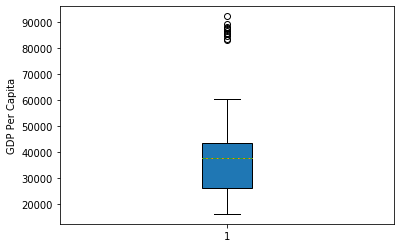

In [33]:
plt.boxplot(df.GDP_per_capita,meanline=True, showmeans=True,vert=True,patch_artist=True)
plt.ylabel("GDP Per Capita")

In [34]:
temp_df = df
q1 = temp_df['GDP_per_capita'].quantile(.25)
q3 = temp_df['GDP_per_capita'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
outlierstop=temp_df[temp_df['GDP_per_capita']> toprange]
outliersbot=temp_df[temp_df['GDP_per_capita']< botrange]
outliers = pd.concat([outliersbot, outlierstop], axis=0)

# no_outliers = filtered_data-outliers
df=temp_df.loc[(temp_df['GDP_per_capita']>botrange) & (temp_df['GDP_per_capita']< toprange)]
print(df.shape)
df.head(10)

(294, 16)


,Country,Time,child,elderly,teenager,youngadult,adult,pop_size,Recycling,Incineration,Landfill,waste_generated,waste_treated,GDP_per_capita,delta_GDP,delta_GDP_Perc
0,Australia,2007,19.430,13.139,13.942,28.558320,24.929730,20827622.0,36.803,6.891,56.306,12798.666,12798.666,42300.58,717.29,1.724948
1,Australia,2008,19.299,13.201,13.996,28.459021,25.044935,21249199.0,38.164,6.850,54.986,13027.542,13027.542,42279.15,-21.43,-0.050661
2,Australia,2009,19.169,13.326,14.032,28.444255,25.029001,21691653.0,39.478,6.811,53.711,13256.419,13256.419,42322.84,43.69,0.103337
3,Australia,2010,19.057,13.556,13.912,28.427615,25.046462,22031750.0,39.985,7.932,52.083,13515.592,13515.592,42574.69,251.85,0.595069
4,Australia,2011,18.951,13.822,13.720,28.448873,25.057686,22340024.0,42.261,9.109,48.630,13462.519,13462.519,43483.14,908.45,2.133779
5,Australia,2012,18.932,14.137,13.588,28.504040,24.838185,22733465.0,42.239,10.063,47.698,13344.891,13344.891,43907.62,424.48,0.976194
6,Australia,2013,18.929,14.400,13.455,28.522800,24.693096,23128129.0,42.216,11.034,46.749,13227.263,13227.263,44355.80,448.18,1.020734
7,Australia,2014,18.912,14.663,13.343,28.452119,24.630352,23475686.0,42.193,12.023,45.784,13109.635,13109.635,44735.02,379.22,0.854950
8,Australia,2015,18.893,14.924,13.210,28.411515,24.561451,23815995.0,42.004,9.391,48.605,13344.539,13344.539,45362.43,627.41,1.402503
9,Austria,2007,15.508,17.026,12.268,29.665123,25.533439,8295189.0,27.123,29.903,8.791,4951.100,4859.400,42497.27,1386.72,3.373149


<a id='planing'></a>

## 2.model planning

<a id='sacle'></a>

#### scale the data for linear reggresion

In [35]:
##scale features
scaler = StandardScaler()
scaler.fit(df.drop(df.columns[[0,1]], axis=1))
scaler_df = pd.DataFrame(scaler.transform(df.drop(df.columns[[0,1]], axis=1)), columns=df.columns[2:])
scaled_df = pd.DataFrame(scaler.transform(df.drop(df.columns[[0,1]], axis=1)), columns=df.columns[2:])
scaled_df['Country']=df['Country']
scaled_df['Time']=df['Time']
scaled_df.head(8)

,child,elderly,teenager,youngadult,adult,pop_size,Recycling,Incineration,Landfill,waste_generated,waste_treated,GDP_per_capita,delta_GDP,delta_GDP_Perc,Country,Time
0,1.122031,-1.081607,0.950885,0.313451,-0.733065,-0.242538,1.052872,-0.910774,0.555678,-0.152374,-0.145678,0.606378,0.395141,0.178987,Australia,2007.0
1,1.072039,-1.063511,0.984416,0.264684,-0.672955,-0.235288,1.167975,-0.912777,0.514566,-0.146677,-0.139979,0.604365,-0.316922,-0.335542,Australia,2008.0
2,1.022429,-1.027028,1.006770,0.257432,-0.681269,-0.227678,1.279104,-0.914683,0.474855,-0.140980,-0.134280,0.608469,-0.254152,-0.290917,Australia,2009.0
3,0.979688,-0.959898,0.932256,0.249260,-0.672158,-0.221829,1.321982,-0.859906,0.424149,-0.134528,-0.127827,0.632127,-0.053504,-0.148425,Australia,2010.0
4,0.939237,-0.882262,0.813034,0.259700,-0.666302,-0.216528,1.514469,-0.802393,0.316603,-0.135849,-0.129148,0.717466,0.579403,0.297457,Australia,2011.0
5,0.931986,-0.790324,0.731068,0.286793,-0.780831,-0.209761,1.512608,-0.755776,0.287575,-0.138777,-0.132077,0.757341,0.112897,-0.037983,Australia,2012.0
6,0.930841,-0.713563,0.648482,0.296006,-0.856534,-0.202974,1.510663,-0.708329,0.258017,-0.141705,-0.135006,0.799442,0.135742,-0.025077,Australia,2013.0
7,0.924354,-0.636802,0.578935,0.261294,-0.889272,-0.196997,1.508718,-0.660002,0.227962,-0.144633,-0.137935,0.835066,0.069270,-0.073117,Australia,2014.0


<a id='dgp_r'></a>

#### discover the GDP ranges for the models

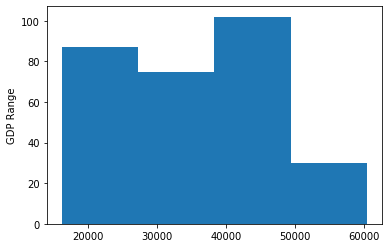

In [36]:
his=df['GDP_per_capita']
plt.hist(his, bins=4)
plt.ylabel('GDP Range')
plt.show()

<a id='corr'></a>

#### the correlation between the features

In [37]:
df.corr()

,Time,child,elderly,teenager,youngadult,adult,pop_size,Recycling,Incineration,Landfill,waste_generated,waste_treated,GDP_per_capita,delta_GDP,delta_GDP_Perc
Time,1.000000,-0.108407,0.299225,-0.371634,-0.281874,0.225040,-0.043655,0.149253,0.183264,-0.237306,-0.051806,-0.050575,0.053096,0.260871,0.202680
child,-0.108407,1.000000,-0.735048,0.678850,0.165597,-0.799566,0.161998,-0.124562,-0.177691,0.190675,0.188395,0.179303,0.212319,0.002777,0.017459
elderly,0.299225,-0.735048,1.000000,-0.820846,-0.634400,0.581039,-0.051868,0.090430,0.460268,-0.416068,-0.089664,-0.080830,0.036851,-0.039981,-0.095882
teenager,-0.371634,0.678850,-0.820846,1.000000,0.295837,-0.615310,0.080352,-0.240866,-0.435786,0.459031,0.112401,0.104175,-0.095044,0.022519,0.085456
youngadult,-0.281874,0.165597,-0.634400,0.295837,1.000000,-0.403310,-0.138454,-0.129269,-0.468449,0.483882,-0.162856,-0.169456,-0.354567,0.010764,0.075179
adult,0.225040,-0.799566,0.581039,-0.615310,-0.403310,1.000000,-0.049175,0.348380,0.284039,-0.416724,-0.018709,-0.008146,0.100402,0.037328,-0.004140
pop_size,-0.043655,0.161998,-0.051868,0.080352,-0.138454,-0.049175,1.000000,0.071266,0.027854,-0.011280,0.971854,0.970444,0.157364,0.005535,-0.016278
Recycling,0.149253,-0.124562,0.090430,-0.240866,-0.129269,0.348380,0.071266,1.000000,0.357310,-0.663854,0.084721,0.092449,0.538132,0.080693,-0.008360
Incineration,0.183264,-0.177691,0.460268,-0.435786,-0.468449,0.284039,0.027854,0.357310,1.000000,-0.895447,-0.033906,-0.025668,0.575295,0.013029,-0.072346
Landfill,-0.237306,0.190675,-0.416068,0.459031,0.483882,-0.416724,-0.011280,-0.663854,-0.895447,1.000000,0.005973,-0.003010,-0.698092,-0.046962,0.058746


<a id='linregI'></a>

#### linear regression of incineration

In [38]:
#p-values Incineration
import statsmodels.formula.api as smf
linreg=smf.ols('Incineration~child+elderly+teenager+youngadult+adult+GDP_per_capita+delta_GDP_Perc+delta_GDP+pop_size',data=scaled_df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Incineration   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     39.02
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           9.02e-45
Time:                        01:04:09   Log-Likelihood:                -298.83
No. Observations:                 294   AIC:                             617.7
Df Residuals:                     284   BIC:                             654.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.995e-17      0.040   5.03e-16      1.000      -0.078       0.078
child            792.4936    223.325      3.549      0.000     352.910    1232.077
elderly         1036.4999    291.992      3.550      0.000     461.757    1611.243
teenager         486.8781    137.242      3.548      0.000     216.737     757.020
youngadult       615.7306    173.531      3.548      0.000     274.161     957.300
adult            579.5458    163.339      3.548      0.000     258.038     901.054
GDP_per_capita     0.5472      0.051     10.662      0.000       0.446       0.648
delta_GDP_Perc     0.1266      0.126      1.003      0.317      -0.122       0.375
delta_GDP         -0.0782      0.125     -0.627      0.531      -0.323       0.167
pop_size          -0.0491      0.041     -1.196      0.233      -0.130       0.032
==============================================================================
Omnibus:                        4.179   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                4.239
Skew:                           0.289   Prob(JB):                        0.120
Kurtosis:                       2.888   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='linregR'></a>

#### linear regression for recycling

In [39]:
#p-values Recycling
import statsmodels.formula.api as smf
linreg=smf.ols('Recycling~child+elderly+teenager+youngadult+adult+GDP_per_capita+delta_GDP_Perc+delta_GDP+pop_size',data=scaled_df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Recycling   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     23.70
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           4.72e-30
Time:                        01:04:10   Log-Likelihood:                -334.82
No. Observations:                 294   AIC:                             689.6
Df Residuals:                     284   BIC:                             726.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.332e-17      0.045   1.41e-15      1.000      -0.088       0.088
child            -53.2660    252.409     -0.211      0.833    -550.096     443.564
elderly          -69.7954    330.018     -0.211      0.833    -719.387     579.796
teenager         -32.8725    155.116     -0.212      0.832    -338.194     272.449
youngadult       -41.2299    196.129     -0.210      0.834    -427.282     344.822
adult            -38.6030    184.610     -0.209      0.835    -401.981     324.775
GDP_per_capita     0.5333      0.058      9.194      0.000       0.419       0.647
delta_GDP_Perc    -0.1361      0.143     -0.954      0.341      -0.417       0.145
delta_GDP          0.2035      0.141      1.445      0.150      -0.074       0.481
pop_size           0.0275      0.046      0.592      0.554      -0.064       0.119
==============================================================================
Omnibus:                       42.015   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.083
Skew:                           0.897   Prob(JB):                     5.44e-14
Kurtosis:                       4.328   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='linregL'></a>

#### linear regression for landfill

In [63]:
#p-values Landfill
import statsmodels.formula.api as smf
linreg=smf.ols('Landfill~child+elderly+teenager+youngadult+adult+GDP_per_capita+delta_GDP_Perc+delta_GDP+pop_size',data=scaled_df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Landfill   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     71.05
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           1.66e-67
Time:                        23:07:22   Log-Likelihood:                -243.84
No. Observations:                 294   AIC:                             507.7
Df Residuals:                     284   BIC:                             544.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.274e-17      0.033  -9.95e-16      1.000      -0.065       0.065
child           -511.7484    185.224     -2.763      0.006    -876.334    -147.162
elderly         -669.1139    242.175     -2.763      0.006   -1145.800    -192.428
teenager        -314.2204    113.828     -2.760      0.006    -538.273     -90.168
youngadult      -397.5075    143.925     -2.762      0.006    -680.802    -114.213
adult           -374.4068    135.471     -2.764      0.006    -641.062    -107.751
GDP_per_capita    -0.6239      0.043    -14.657      0.000      -0.708      -0.540
delta_GDP_Perc    -0.0477      0.105     -0.455      0.649      -0.254       0.158
delta_GDP         -0.0176      0.103     -0.170      0.865      -0.221       0.186
pop_size           0.0831      0.034      2.443      0.015       0.016       0.150
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.171
Skew:                          -0.233   Prob(JB):                        0.205
Kurtosis:                       2.794   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='linregW'></a>

#### linear regression for waste generated

In [24]:
#p-values waste generated
import statsmodels.formula.api as smf
linreg=smf.ols('waste_generated~child+elderly+teenager+youngadult+adult+GDP_per_capita+delta_GDP_Perc+delta_GDP+pop_size',data=scaled_df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        waste_generated   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     704.8
Date:                Sun, 26 Jan 2020   Prob (F-statistic):          1.46e-188
Time:                        21:02:58   Log-Likelihood:                 45.881
No. Observations:                 294   AIC:                            -71.76
Df Residuals:                     284   BIC:                            -34.93
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.674e-18      0.012  -7.06e-16      1.000      -0.024       0.024
child           -114.8697     69.140     -1.661      0.098    -250.961      21.222
elderly         -150.3102     90.399     -1.663      0.097    -328.246      27.626
teenager         -70.5866     42.489     -1.661      0.098    -154.220      13.047
youngadult       -89.3201     53.724     -1.663      0.097    -195.067      16.427
adult            -83.9434     50.568     -1.660      0.098    -183.480      15.593
GDP_per_capita     0.0448      0.016      2.819      0.005       0.014       0.076
delta_GDP_Perc    -0.0380      0.039     -0.972      0.332      -0.115       0.039
delta_GDP          0.0226      0.039      0.587      0.558      -0.053       0.099
pop_size           0.9535      0.013     75.097      0.000       0.929       0.979
==============================================================================
Omnibus:                       35.917   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.670
Skew:                          -0.604   Prob(JB):                     1.84e-18
Kurtosis:                       5.282   Cond. No.                     2.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id='models'></a>

## 3.Models And Evaluate

<a id='m1'></a>

### models of treatment type predict

<a id='m1a'></a>

#### model of landfill treatment type predict

In [29]:
##linreg model
x=df[['child','elderly','teenager','youngadult','adult','pop_size','GDP_per_capita']]
y=df[['Landfill']]

In [30]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

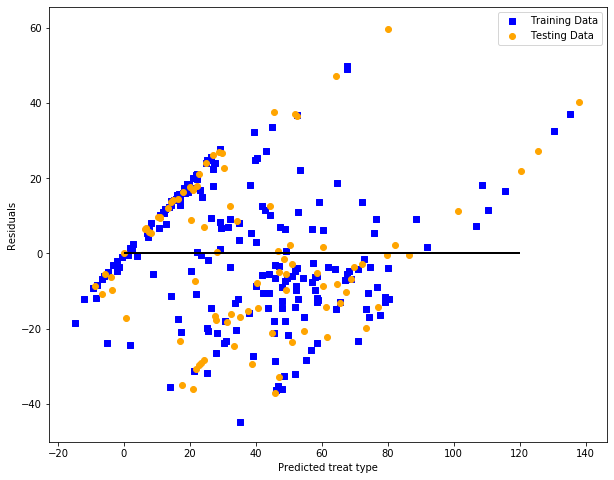

In [31]:
train_residual = y_train_pred - y_train
test_residual = y_test_pred - y_test
plt.figure(figsize=(10,8))
plt.scatter(y_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=120, lw=2, color='k')
plt.show()

In [32]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("MAE:",metrics.mean_absolute_error(y_train, y_train_pred))
print("R-squared:",r2_score(y_train, y_train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_test_pred))
print("R-squared:",r2_score(y_test, y_test_pred))

------ TRAIN DATA ------
MSE: 294.4093343425553
RMSE: 17.15836047944428
MAE: 14.160786643388132
R-squared: 0.7138804067176445
------ TEST DATA ------
MSE: 404.3822431028373
RMSE: 20.109257646736673
MAE: 16.236540671308163
R-squared: 0.6081596853611972


In [282]:
scy = StandardScaler()
scy_t = StandardScaler()
scaley_pred = scy.fit_transform(y_test_pred)
scaley_test = scy_t.fit_transform(y_test)
inversed = scy.inverse_transform(scaley_pred)
inversed_test=scy.inverse_transform(scaley_test)

In [283]:
general_treat_results=pd.DataFrame()
general_treat_results['Landfill_True']=inversed_test.ravel()
general_treat_results['Landfill_Predict']=inversed.ravel()
general_treat_results['Difference']=general_treat_results['Landfill_True']-general_treat_results['Landfill_Predict']
general_treat_results.head(10)

,Landfill_True,Landfill_Predict,Difference
0,4.646573,22.799152,-18.152578
1,75.652317,47.178690,28.473628
2,71.745140,68.770496,2.974644
3,46.727070,50.265051,-3.537981
4,78.281556,45.788924,32.492632
5,21.645602,79.947464,-58.301863
6,4.519776,11.024546,-6.504770
7,92.469301,125.651002,-33.181702
8,13.643768,20.423094,-6.779326
9,3.232780,6.636695,-3.403915


<a id='m1b'></a>

#### model of Incineration treatment type predict

In [70]:
##linreg model
x_t_i=df[['child','elderly','teenager','youngadult','adult','GDP_per_capita']]
y_t_i=df[['Incineration']]

In [71]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(x_t_i, y_t_i, test_size=0.3, random_state=100)
# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_i_train, y_i_train)
y_test_i_pred = lm.predict(X_i_test)
y_train_i_pred = lm.predict(X_i_train)

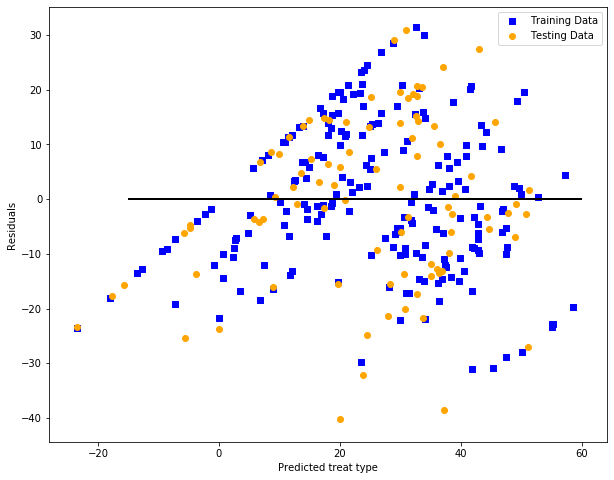

In [72]:
train_residual = y_train_i_pred - y_i_train
test_residual = y_test_i_pred - y_i_test
plt.figure(figsize=(10,8))
plt.scatter(y_train_i_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_i_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-15, xmax=60, lw=2, color='k')
plt.show()

In [73]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_i_train, y_train_i_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_i_train, y_train_i_pred)))
print("MAE:",metrics.mean_absolute_error(y_i_train, y_train_i_pred))
print("R-squared:",r2_score(y_i_train, y_train_i_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_i_test, y_test_i_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_i_test, y_test_i_pred)))
print("MAE:",metrics.mean_absolute_error(y_i_test, y_test_i_pred))
print("R-squared:",r2_score(y_i_test, y_test_i_pred))

------ TRAIN DATA ------
MSE: 173.46892676590218
RMSE: 13.170760295666389
MAE: 10.877406464620254
R-squared: 0.5914056979019308
------ TEST DATA ------
MSE: 233.97027247739385
RMSE: 15.296086835442386
MAE: 12.385874767618356
R-squared: 0.42279811078384455


In [288]:
scy_i_t = StandardScaler()
scy_i = StandardScaler()
scaley_i_pred = scy_i.fit_transform(y_test_i_pred)
scaley_i_test = scy_i_t.fit_transform(y_i_test)
inversed_i = scy_i.inverse_transform(scaley_i_pred)
inversed_i_test=scy_i.inverse_transform(scaley_i_test)

In [289]:
general_t_i_results=pd.DataFrame()
general_t_i_results['Incineration_True']=inversed_i_test.ravel()
general_t_i_results['Incineration_Predict']=inversed_i.ravel()
general_t_i_results['Difference']=general_t_i_results['Incineration_True']-general_t_i_results['Incineration_Predict']
general_t_i_results.head(10)

,Incineration_True,Incineration_Predict,Difference
0,43.918338,24.414766,19.503572
1,4.392183,30.986193,-26.594010
2,4.404989,6.756799,-2.351810
3,6.441966,17.335007,-10.893041
4,4.392183,28.994688,-24.602505
5,20.298211,-5.417966,25.716177
6,41.861352,34.869868,6.991484
7,4.392183,-17.599311,21.991494
8,42.746576,37.830298,4.916278
9,44.308926,36.745280,7.563645


<a id='m1c'></a>

#### model of Recycling treatment type predict

In [290]:
##linreg model
x_t_r=df[['child','elderly','teenager','youngadult','adult','pop_size','GDP_per_capita']]
y_t_r=df[['Recycling']]

In [291]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(x_t_r, y_t_r, test_size=0.3, random_state=100)
# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_r_train, y_r_train)
y_test_r_pred = lm.predict(X_r_test)
y_train_r_pred = lm.predict(X_r_train)

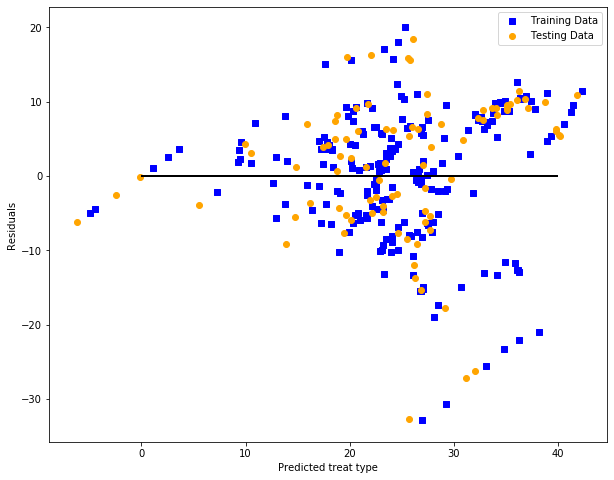

In [292]:
train_residual = y_train_r_pred - y_r_train
test_residual = y_test_r_pred - y_r_test
plt.figure(figsize=(10,8))
plt.scatter(y_train_r_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_r_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=40, lw=2, color='k')
plt.show()

In [293]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_r_train, y_train_r_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_r_train, y_train_r_pred)))
print("MAE:",metrics.mean_absolute_error(y_r_train, y_train_r_pred))
print("R-squared:",r2_score(y_r_train, y_train_r_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_r_test, y_test_r_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_r_test, y_test_r_pred)))
print("MAE:",metrics.mean_absolute_error(y_r_test, y_test_r_pred))
print("R-squared:",r2_score(y_r_test, y_test_r_pred))

------ TRAIN DATA ------
MSE: 77.92053635255189
RMSE: 8.827260976800895
MAE: 6.959017428840633
R-squared: 0.4492569459257516
------ TEST DATA ------
MSE: 90.61139097826242
RMSE: 9.519001574653847
MAE: 7.6556063662609874
R-squared: 0.32754327371034764


In [294]:
scy_r_t = StandardScaler()
scy_r = StandardScaler()
scaley_r_pred = scy_r.fit_transform(y_test_r_pred)
scaley_r_test = scy_r_t.fit_transform(y_r_test)
inversed_r = scy_r.inverse_transform(scaley_r_pred)
inversed_r_test=scy_r.inverse_transform(scaley_r_test)

In [295]:
general_t_r_results=pd.DataFrame()
general_t_r_results['Recycling_True']=inversed_r_test.ravel()
general_t_r_results['Recycling_Predict']=inversed_i.ravel()
general_t_r_results['Difference']=general_t_r_results['Recycling_True']-general_t_r_results['Recycling_Predict']
general_t_r_results.head(10)

,Recycling_True,Recycling_Predict,Difference
0,25.710611,24.414766,1.295846
1,20.732632,30.986193,-10.253560
2,22.501473,6.756799,15.744674
3,19.420015,17.335007,2.085008
4,18.124526,28.994688,-10.870161
5,52.103866,-5.417966,57.521832
6,25.756545,34.869868,-9.113322
7,6.651196,-17.599311,24.250507
8,28.552279,37.830298,-9.278019
9,33.583199,36.745280,-3.162081


<a id='m2'></a>

### waste generated predict

In [297]:
##linreg model
x_w=df[['child','elderly','teenager','youngadult','adult','pop_size','GDP_per_capita']]
y_w=df[['waste_generated']]

In [303]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(x_w, y_w, test_size=0.3, random_state=100)
# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_w_train, y_w_train)
y_test_w_pred = lm.predict(X_w_test)
y_train_w_pred = lm.predict(X_w_train)

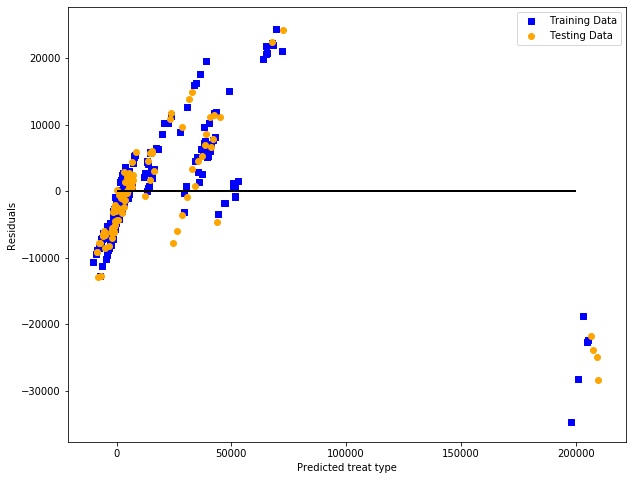

In [305]:
train_residual = y_train_w_pred - y_w_train
test_residual = y_test_w_pred - y_w_test
plt.figure(figsize=(10,8))
plt.scatter(y_train_w_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_w_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=200000, lw=2, color='k')
plt.show()

In [306]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_w_train, y_train_w_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_w_train, y_train_w_pred)))
print("MAE:",metrics.mean_absolute_error(y_w_train, y_train_w_pred))
print("R-squared:",r2_score(y_w_train, y_train_w_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_w_test, y_test_w_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_w_test, y_test_w_pred)))
print("MAE:",metrics.mean_absolute_error(y_w_test, y_test_w_pred))
print("R-squared:",r2_score(y_w_test, y_test_w_pred))

------ TRAIN DATA ------
MSE: 69520591.5179297
RMSE: 8337.900905979257
MAE: 5955.256922780113
R-squared: 0.9475518328444112
------ TEST DATA ------
MSE: 75221469.85733163
RMSE: 8673.03118046578
MAE: 6221.5312340855235
R-squared: 0.9668639942079107


In [307]:
scy_w_t = StandardScaler()
scy_w = StandardScaler()
scaley_w_pred = scy_w.fit_transform(y_test_w_pred)
scaley_w_test = scy_w_t.fit_transform(y_w_test)
inversed_w = scy_w.inverse_transform(scaley_w_pred)
inversed_w_test=scy_w.inverse_transform(scaley_w_test)

In [308]:
general_w_results=pd.DataFrame()
general_w_results['Waste_generated_True']=inversed_w_test.ravel()
general_w_results['Waste_generated_Predict']=inversed_w.ravel()
general_w_results['Difference']=general_w_results['Waste_generated_True']-general_w_results['Waste_generated_Predict']
general_w_results.head(10)

,Waste_generated_True,Waste_generated_Predict,Difference
0,9733.448985,15501.674310,-5768.225325
1,5330.964394,-7878.184576,13209.148970
2,1918.360301,-777.661584,2696.021885
3,1427.872358,-5890.251243,7318.123601
4,6181.828847,-6814.597927,12996.426774
5,18348.056532,28697.232411,-10349.175878
6,8922.924839,14664.189009,-5741.264169
7,28318.804823,40901.884698,-12583.079876
8,3227.208076,-307.080814,3534.288890
9,5773.778274,6804.362708,-1030.584434


<a id='m3'></a>

#### treatment type predict with GDP

In [37]:
##linreg model
x_t_gdp=df[['child','elderly','teenager','youngadult','adult','GDP_per_capita']]
y_t_gdp=df[['Incineration']]

In [38]:
scx_t_gdp = StandardScaler()
scy_t_gdp = StandardScaler()
scalex_t_gdp = scx_t_gdp.fit_transform(x_t_gdp)
scaley_t_gdp = scy_t_gdp.fit_transform(y_t_gdp)

In [39]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_train, X_t_gdp_test, y_t_gdp_train, y_t_gdp_test = train_test_split(scalex_t_gdp, scaley_t_gdp, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_train, y_t_gdp_train)
y_t_gdp_pred = lm.predict(X_t_gdp_test)
print ("RMSE=" ,np.sqrt(metrics.mean_squared_error(y_t_gdp_test, y_t_gdp_pred)))
print ("MSE=" , metrics.mean_squared_error(y_t_gdp_test, y_t_gdp_pred))

RMSE= 0.7474312891965614
MSE= 0.5586535320700339


In [40]:
inversed = scy_t_gdp.inverse_transform(y_t_gdp_pred)
inversed_test=scy_t_gdp.inverse_transform(y_t_gdp_test)

In [41]:
general_gdp_treat_results=pd.DataFrame()
general_gdp_treat_results['Incineration_true']=inversed_test.ravel()
general_gdp_treat_results['Incineration_predict']=inversed.ravel()
general_gdp_treat_results['Difference']=general_gdp_treat_results['Incineration_true']-general_gdp_treat_results['Incineration_predict']
general_gdp_treat_results.head(10)

,Incineration_true,Incineration_predict,Difference
0,49.384,24.511094,24.872906
1,0.000,30.999612,-30.999612
2,0.016,6.861014,-6.845014
3,2.561,17.443496,-14.882496
4,0.000,29.017691,-29.017691
5,19.873,-5.583181,25.456181
6,46.814,34.992383,11.821617
7,0.000,-17.727075,17.727075
8,47.920,37.991882,9.928118
9,49.872,36.807080,13.064920


In [42]:
res2=general_gdp_treat_results['Difference']**2
mse = res2.mean()
resMeanSqr= (general_gdp_treat_results['Incineration_true']-general_gdp_treat_results['Incineration_predict'].mean())**2

print ("R-squared:" ,1-mse/resMeanSqr.mean())

R-squared: 0.4233795198911524


<a id='m4'></a>

#### treatment type predict per range of GDP (25,000-40,000)

In [309]:
##linreg model
x_t_gdp_25=df[(df['GDP_per_capita'] >= 25000)&(df['GDP_per_capita'] < 40000)][['child','elderly','teenager','youngadult','adult']]
y_t_gdp_25=df[(df['GDP_per_capita'] >= 25000)&(df['GDP_per_capita'] < 40000)][['Incineration']]

In [310]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_25_train, X_t_gdp_25_test, y_t_gdp_25_train, y_t_gdp_25_test = train_test_split(x_t_gdp_25, y_t_gdp_25, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_25_train, y_t_gdp_25_train)
y_t_gdp_25_test_pred = lm.predict(X_t_gdp_25_test)
y_t_gdp_25_train_pred = lm.predict(X_t_gdp_25_train)

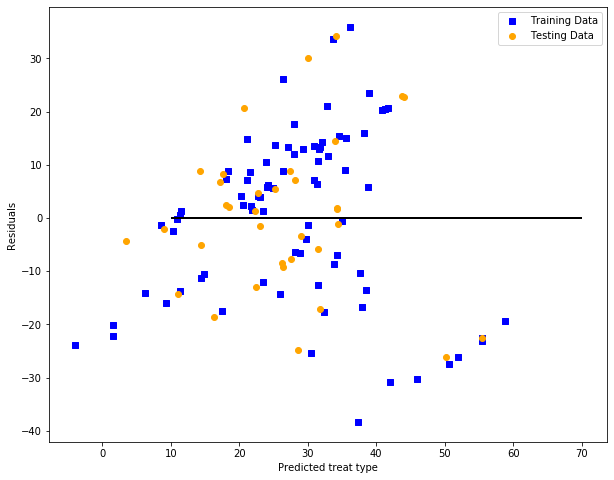

In [311]:
train_residual = y_t_gdp_25_train_pred - y_t_gdp_25_train
test_residual = y_t_gdp_25_test_pred - y_t_gdp_25_test
plt.figure(figsize=(10,8))
plt.scatter(y_t_gdp_25_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_t_gdp_25_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=10, xmax=70, lw=2, color='k')
plt.show()

In [312]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_25_train, y_t_gdp_25_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_25_train, y_t_gdp_25_train_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_25_train, y_t_gdp_25_train_pred))
print("R-squared:",r2_score(y_t_gdp_25_train, y_t_gdp_25_train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_25_test, y_t_gdp_25_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_25_test, y_t_gdp_25_test_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_25_test, y_t_gdp_25_test_pred))
print("R-squared:",r2_score(y_t_gdp_25_test, y_t_gdp_25_test_pred))

------ TRAIN DATA ------
MSE: 252.44361943144298
RMSE: 15.888474421147015
MAE: 13.196584477036666
R-squared: 0.3743322496306023
------ TEST DATA ------
MSE: 207.42025309251326
RMSE: 14.402091969311725
MAE: 11.11223915038154
R-squared: 0.35919424148540813


In [306]:
sc_train_t_gdp_25 = StandardScaler()
sc_test_t_gdp_25 = StandardScaler()
scaley_t_gdp_25_pred = sc_train_t_gdp_25.fit_transform(y_t_gdp_25_test_pred)
scaley_t_gdp_25_test = sc_test_t_gdp_25.fit_transform(y_t_gdp_25_test)
inversed = sc_train_t_gdp_25.inverse_transform(scaley_t_gdp_25_pred)
inversed_test=sc_test_t_gdp_25.inverse_transform(scaley_t_gdp_25_test)

In [307]:
general_gdp_treat_results_25=pd.DataFrame()
general_gdp_treat_results_25['Incineration_true']=inversed_test.ravel()
general_gdp_treat_results_25['Incineration_predict']=inversed.ravel()
general_gdp_treat_results_25['Difference']=general_gdp_treat_results_25['Incineration_true']-general_gdp_treat_results_25['Incineration_predict']
general_gdp_treat_results_25.head()

,Incineration_true,Incineration_predict,Difference
0,74.290,56.171472,18.118528
1,58.869,39.573611,19.295389
2,38.244,19.665588,18.578412
3,24.768,30.602611,-5.834611
4,1.330,38.160723,-36.830723


<a id='m5'></a>

#### treatment type predict per range of GDP (10,000-25,000)

In [233]:
x_t_gdp_10=df[(df['GDP_per_capita'] >= 10000)&(df['GDP_per_capita'] < 25000)][['child','elderly','teenager','youngadult','adult','GDP_per_capita','pop_size']]
y_t_gdp_10=df[(df['GDP_per_capita'] >= 10000)&(df['GDP_per_capita'] < 25000)][['Landfill']]

In [234]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_10_train, X_t_gdp_10_test, y_t_gdp_10_train, y_t_gdp_10_test = train_test_split(x_t_gdp_10, y_t_gdp_10, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_10_train, y_t_gdp_10_train)
y_gdp_10_test_pred = lm.predict(X_t_gdp_10_test)
y_gdp_10_train_pred = lm.predict(X_t_gdp_10_train)

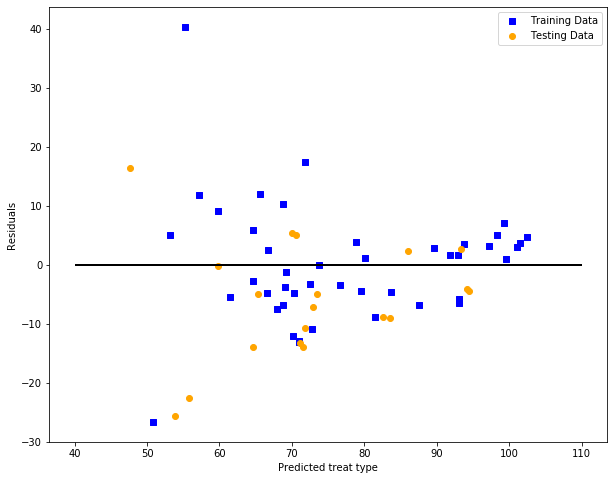

In [235]:
train_residual = y_gdp_10_train_pred - y_t_gdp_10_train
test_residual = y_gdp_10_test_pred - y_t_gdp_10_test
plt.figure(figsize=(10,8))
plt.scatter(y_gdp_10_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_gdp_10_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=40, xmax=110, lw=2, color='k')
plt.show()

In [236]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_10_train, y_gdp_10_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_10_train, y_gdp_10_train_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_10_train, y_gdp_10_train_pred))
print("R-squared:",r2_score(y_t_gdp_10_train, y_gdp_10_train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_10_test, y_gdp_10_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_10_test, y_gdp_10_test_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_10_test, y_gdp_10_test_pred))
print("R-squared:",r2_score(y_t_gdp_10_test, y_gdp_10_test_pred))

------ TRAIN DATA ------
MSE: 100.7577788345428
RMSE: 10.037817433812133
MAE: 7.129424346794596
R-squared: 0.6749365596706185
------ TEST DATA ------
MSE: 130.62593073108394
RMSE: 11.429170168086742
MAE: 9.252779037383727
R-squared: 0.4423398553277619


In [237]:
sc_t_gdp_10_train = StandardScaler()
sc_t_gdp_10_test = StandardScaler()
scale_t_gdp_10_pred = sc_t_gdp_10_train.fit_transform(y_gdp_10_test_pred)
scale_t_gdp_10_test = sc_t_gdp_10_test.fit_transform(y_t_gdp_10_test)
inversed = sc_train_t_gdp_10.inverse_transform(scale_t_gdp_10_pred)
inversed_test=sc_test_t_gdp_10.inverse_transform(scale_t_gdp_10_test)


In [238]:
general_gdp_treat_results_10=pd.DataFrame()
general_gdp_treat_results_10['Landfill_true']=inversed_test.ravel()
general_gdp_treat_results_10['Landfill_predict']=inversed.ravel()
general_gdp_treat_results_10['Difference']=general_gdp_treat_results_10['Landfill_true']-general_gdp_treat_results_10['Landfill_predict']
general_gdp_treat_results_10.head()

,Landfill_true,Landfill_predict,Difference
0,69.543904,70.076443,-0.532539
1,95.890109,103.475895,-7.585786
2,64.068264,75.493876,-11.425612
3,32.569627,49.615940,-17.046313
4,90.374776,91.055834,-0.681058


<a id='m6'></a>

#### treatment type predict per range of GDP (40,000-50,000)

In [239]:
x_t_gdp_40=df[(df['GDP_per_capita'] >= 40000)&(df['GDP_per_capita'] < 50000)][['child','elderly','teenager','youngadult','adult','pop_size','GDP_per_capita']]
y_t_gdp_40=df[(df['GDP_per_capita'] >= 40000)&(df['GDP_per_capita'] < 50000)][['Landfill']]

In [240]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_40_train, X_t_gdp_40_test, y_t_gdp_40_train, y_t_gdp_40_test = train_test_split(x_t_gdp_40, y_t_gdp_40, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_40_train, y_t_gdp_40_train)
y_t_gdp_40_test_pred = lm.predict(X_t_gdp_40_test)
y_t_gdp_40_train_pred = lm.predict(X_t_gdp_40_train)

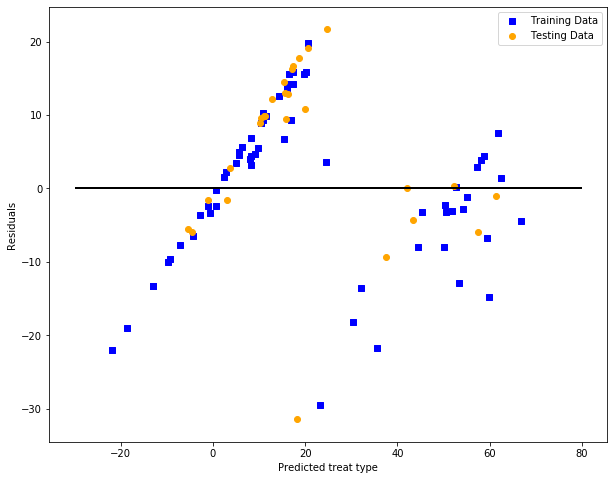

In [241]:
train_residual = y_t_gdp_40_train_pred - y_t_gdp_40_train
test_residual = y_t_gdp_40_test_pred - y_t_gdp_40_test
plt.figure(figsize=(10,8))
plt.scatter(y_t_gdp_40_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_t_gdp_40_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-30, xmax=80, lw=2, color='k')
plt.show()

In [242]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_40_train, y_t_gdp_40_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_40_train, y_t_gdp_40_train_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_40_train, y_t_gdp_40_train_pred))
print("R-squared:",r2_score(y_t_gdp_40_train, y_t_gdp_40_train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_40_test, y_t_gdp_40_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_40_test, y_t_gdp_40_test_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_40_test, y_t_gdp_40_test_pred))
print("R-squared:",r2_score(y_t_gdp_40_test, y_t_gdp_40_test_pred))

------ TRAIN DATA ------
MSE: 111.11827046738502
RMSE: 10.541265126510433
MAE: 8.47820332989299
R-squared: 0.8391853682186573
------ TEST DATA ------
MSE: 154.44873031879595
RMSE: 12.42774035449711
MAE: 10.093179585574022
R-squared: 0.6888249243755827


In [251]:
sc_t_gdp_40_train = StandardScaler()
sc_t_gdp_40_test = StandardScaler()
scale_t_gdp_40_pred = sc_t_gdp_40_train.fit_transform(y_t_gdp_40_test_pred)
scale_t_gdp_40_test = sc_t_gdp_40_test.fit_transform(y_t_gdp_40_test)
inversed = sc_t_gdp_40_train.inverse_transform(scale_t_gdp_40_pred)
inversed_test=sc_t_gdp_40_test.inverse_transform(scale_t_gdp_40_test)


In [252]:
general_gdp_treat_results_40=pd.DataFrame()
general_gdp_treat_results_40['Landfill_true']=inversed_test.ravel()
general_gdp_treat_results_40['Landfill_predict']=inversed.ravel()
general_gdp_treat_results_40['Difference']=general_gdp_treat_results_40['Landfill_true']-general_gdp_treat_results_40['Landfill_predict']
general_gdp_treat_results_40.head()

,Landfill_true,Landfill_predict,Difference
0,62.461,61.472122,0.988878
1,42.124,42.155679,-0.031679
2,0.861,10.437234,-9.576234
3,4.730,3.095985,1.634015
4,0.492,-1.132469,1.624469


<a id='m7'></a>

#### treatment type predict per range of GDP (>50,000)

In [246]:
x_t_gdp_50=df[df['GDP_per_capita'] >= 50000][['child','elderly','teenager','youngadult','adult','GDP_per_capita']]
y_t_gdp_50=df[df['GDP_per_capita'] >= 50000][['Incineration']]

In [247]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_50_train, X_t_gdp_50_test, y_t_gdp_50_train, y_t_gdp_50_test = train_test_split(x_t_gdp_50, y_t_gdp_50, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_50_train, y_t_gdp_50_train)
y_t_gdp_50_train_pred = lm.predict(X_t_gdp_50_train)
y_t_gdp_50_test_pred = lm.predict(X_t_gdp_50_test)

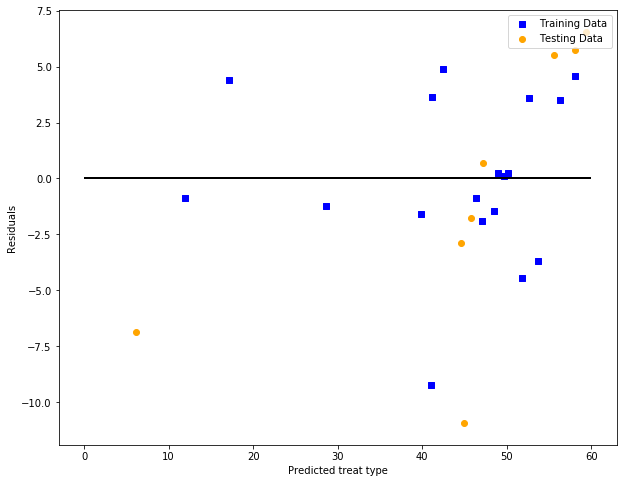

In [258]:
train_residual = y_t_gdp_50_train_pred - y_t_gdp_50_train
test_residual = y_t_gdp_50_test_pred - y_t_gdp_50_test
plt.figure(figsize=(10,8))
plt.scatter(y_t_gdp_50_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_t_gdp_50_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=60, lw=2, color='k')
plt.show()

In [259]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_50_train, y_t_gdp_50_train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_50_train, y_t_gdp_50_train_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_50_train, y_t_gdp_50_train_pred))
print("R-squared:",r2_score(y_t_gdp_50_train, y_t_gdp_50_train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_50_test, y_t_gdp_50_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_50_test, y_t_gdp_50_test_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_50_test, y_t_gdp_50_test_pred))
print("R-squared:",r2_score(y_t_gdp_50_test, y_t_gdp_50_test_pred))

------ TRAIN DATA ------
MSE: 12.90917505690859
RMSE: 3.5929340457220458
MAE: 2.8035502266761996
R-squared: 0.9214900832007914
------ TEST DATA ------
MSE: 35.58717229402036
RMSE: 5.965498495014508
MAE: 5.117719487939599
R-squared: 0.7798202066926774


In [255]:
sc_t_gdp_50_train = StandardScaler()
sc_t_gdp_50_test = StandardScaler()
scale_t_gdp_50_pred = sc_t_gdp_50_train.fit_transform(y_t_gdp_50_test_pred)
scale_t_gdp_50_test = sc_t_gdp_50_test.fit_transform(y_t_gdp_50_test)
inversed = sc_t_gdp_50_train.inverse_transform(scale_t_gdp_50_pred)
inversed_test=sc_t_gdp_50_test.inverse_transform(scale_t_gdp_50_test)


In [256]:
general_gdp_treat_results_40=pd.DataFrame()
general_gdp_treat_results_40['Incineration_true']=inversed_test.ravel()
general_gdp_treat_results_40['Incineration_predict']=inversed.ravel()
general_gdp_treat_results_40['Difference']=general_gdp_treat_results_40['Incineration_true']-general_gdp_treat_results_40['Incineration_predict']
general_gdp_treat_results_40.head()

,Incineration_true,Incineration_predict,Difference
0,52.348,58.110139,-5.762139
1,47.497,44.628350,2.868650
2,50.062,55.580386,-5.518386
3,52.874,59.417124,-6.543124
4,55.805,44.889507,10.915493


<a id='m8'><a>

#### treatment type predict per GDP and Country

In [342]:
x_t_gdp_c=df[df['Country']=='France'][['child','elderly','teenager','youngadult','adult','GDP_per_capita','pop_size']]
y_t_gdp_c=df[df['Country']=='France'][['Landfill']]

In [343]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_t_gdp_c_train, X_t_gdp_c_test, y_t_gdp_c_train, y_t_gdp_c_test = train_test_split(x_t_gdp_c, y_t_gdp_c, test_size=0.3, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_t_gdp_c_train, y_t_gdp_c_train)
y_t_gdp_c__train_pred = lm.predict(X_t_gdp_c_train)
y_t_gdp_c___test_pred  = lm.predict(X_t_gdp_c_test)

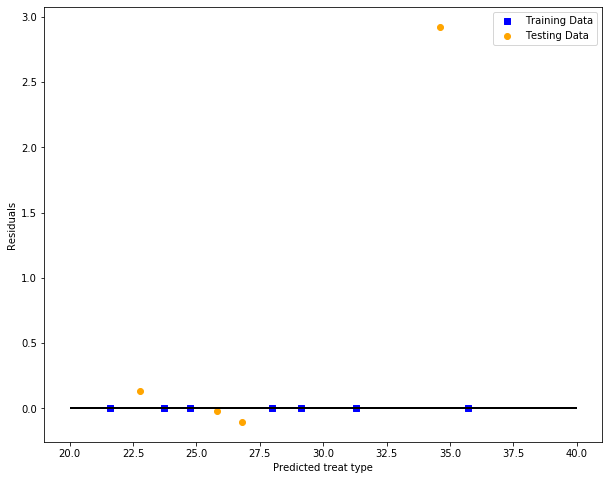

In [350]:
train_residual = y_t_gdp_c__train_pred - y_t_gdp_c_train
test_residual = y_t_gdp_c___test_pred - y_t_gdp_c_test
plt.figure(figsize=(10,8))
plt.scatter(y_t_gdp_c__train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_t_gdp_c___test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=20, xmax=40, lw=2, color='k')
plt.show()

In [345]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_c_train, y_t_gdp_c__train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_c_train, y_t_gdp_c__train_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_c_train, y_t_gdp_c__train_pred))
print("R-squared:",r2_score(y_t_gdp_c_train, y_t_gdp_c__train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_t_gdp_c_test, y_t_gdp_c___test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_t_gdp_c_test, y_t_gdp_c___test_pred)))
print("MAE:",metrics.mean_absolute_error(y_t_gdp_c_test, y_t_gdp_c___test_pred))
print("R-squared:",r2_score(y_t_gdp_c_test, y_t_gdp_c___test_pred))

------ TRAIN DATA ------
MSE: 7.63644526787248e-21
RMSE: 8.738675682202928e-11
MAE: 6.246634955329812e-11
R-squared: 1.0
------ TEST DATA ------
MSE: 2.1463408650637654
RMSE: 1.465039543856672
MAE: 0.7958760010909227
R-squared: 0.7954451930748834


In [346]:
sc_t_gdp_c_train = StandardScaler()
sc_t_gdp_c_test = StandardScaler()
scale_t_gdp_c_pred = sc_t_gdp_c_train.fit_transform(y_t_gdp_c___test_pred)
scale_t_gdp_c_test = sc_t_gdp_c_test.fit_transform(y_t_gdp_c_test)
inversed = sc_t_gdp_c_train.inverse_transform(scale_t_gdp_c_pred)
inversed_test=sc_t_gdp_c_test.inverse_transform(scale_t_gdp_c_test)

In [347]:
general_gdp_treat_results_c=pd.DataFrame()
general_gdp_treat_results_c['Landfill_true']=inversed_test.ravel()
general_gdp_treat_results_c['Landfill_predict']=inversed.ravel()
general_gdp_treat_results_c['Difference']=general_gdp_treat_results_c['Landfill_true']-general_gdp_treat_results_c['Landfill_predict']
general_gdp_treat_results_c.head(100)

,Landfill_true,Landfill_predict,Difference
0,22.642,22.777204,-0.135204
1,25.837,25.817932,0.019068
2,31.673,34.598041,-2.925041
3,26.914,26.809808,0.104192


<a id='m9'><a>

#### waste generated predict per Country

In [64]:
x_w_gdp_c=df[df['Country']=='France'][['child','elderly','teenager','youngadult','adult','GDP_per_capita','pop_size']]
y_w_gdp_c=df[df['Country']=='France'][['waste_generated']]

In [87]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_w_gdp_c_train, X_w_gdp_c_test, y_w_gdp_c_train, y_w_gdp_c_test = train_test_split(x_w_gdp_c, y_w_gdp_c, test_size=0.25, random_state=100)

# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_w_gdp_c_train, y_w_gdp_c_train)
y_w_gdp_c__train_pred = lm.predict(X_w_gdp_c_train)
y_w_gdp_c___test_pred  = lm.predict(X_w_gdp_c_test)

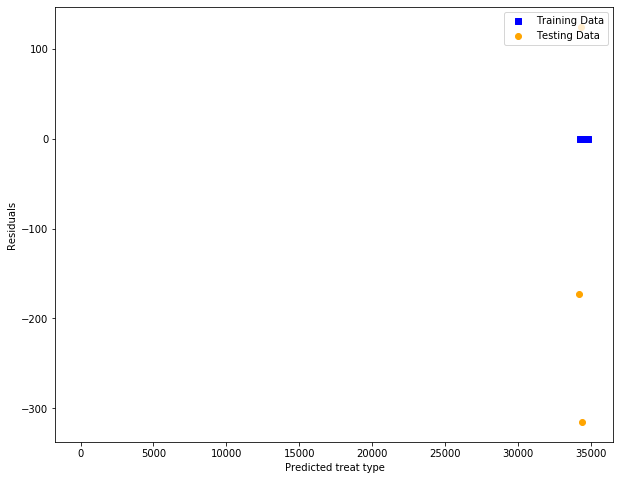

In [88]:
train_residual = y_w_gdp_c__train_pred - y_w_gdp_c_train
test_residual = y_w_gdp_c___test_pred - y_w_gdp_c_test
plt.figure(figsize=(10,8))
plt.scatter(y_w_gdp_c__train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_w_gdp_c___test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=20, xmax=40, lw=2, color='k')
plt.show()

In [89]:
print("------ TRAIN DATA ------")
print("MSE:",metrics.mean_squared_error(y_w_gdp_c_train, y_w_gdp_c__train_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_w_gdp_c_train, y_w_gdp_c__train_pred)))
print("MAE:",metrics.mean_absolute_error(y_w_gdp_c_train, y_w_gdp_c__train_pred))
print("R-squared:",r2_score(y_w_gdp_c_train, y_w_gdp_c__train_pred))
print("------ TEST DATA ------")
print("MSE:",metrics.mean_squared_error(y_w_gdp_c_test, y_w_gdp_c___test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_w_gdp_c_test, y_w_gdp_c___test_pred)))
print("MAE:",metrics.mean_absolute_error(y_w_gdp_c_test, y_w_gdp_c___test_pred))
print("R-squared:",r2_score(y_w_gdp_c_test, y_w_gdp_c___test_pred))

------ TRAIN DATA ------
MSE: 1.8159745174620157e-09
RMSE: 4.2614252515584684e-05
MAE: 2.8524082154035568e-05
R-squared: 0.9999999999999403
------ TEST DATA ------
MSE: 48327.297463734394
RMSE: 219.83470486648463
MAE: 204.43373373399177
R-squared: 0.04750441887532453


In [90]:
sc_w_gdp_c_train = StandardScaler()
sc_w_gdp_c_test = StandardScaler()
scale_w_gdp_c_pred = sc_w_gdp_c_train.fit_transform(y_w_gdp_c___test_pred)
scale_w_gdp_c_test = sc_w_gdp_c_test.fit_transform(y_w_gdp_c_test)
inversed = sc_w_gdp_c_train.inverse_transform(scale_w_gdp_c_pred)
inversed_test=sc_w_gdp_c_test.inverse_transform(scale_w_gdp_c_test)

In [91]:
general_gdp_waste_results_c=pd.DataFrame()
general_gdp_waste_results_c['waste_generated_true']=inversed_test.ravel()
general_gdp_waste_results_c['waste_generated_predict']=inversed.ravel()
general_gdp_waste_results_c['Difference']=general_gdp_waste_results_c['waste_generated_true']-general_gdp_waste_results_c['waste_generated_predict']
general_gdp_waste_results_c.head()

,waste_generated_true,waste_generated_predict,Difference
0,34339.0,34165.741142,173.258858
1,34176.0,34300.772474,-124.772474
2,34714.0,34398.730131,315.269869
